# 432: HW-01

In [20]:
# generating a normally distributed random variable
import numpy
import random

random.seed(1)
x=numpy.random.normal(3,2,100)
print(x[1:10])

[ 0.761014   -0.29650375  3.49776363  3.23708584  3.56823363  3.7587751
  0.88879001  3.19063384  3.38746359]


In [21]:
def my_mean(y):
    s=0
    for el in y:
        s=s+el
    return s/len(y)


In [22]:
my_mean(x)-numpy.mean(x)

-8.881784197001252e-16

In [23]:
def my_var(y):
    v=0
    m=my_mean(y)
    for el in y:
        v=v+((el-m)**2)
    return v/(len(y)-1)    
        

In [25]:
import statistics
#my_var(x)-numpy.var(x)
my_var(x)-statistics.variance(x)

8.881784197001252e-16

In [29]:
def mysummarystat(y):
    return([numpy.mean(y),statistics.variance(y)])

In [30]:
mysummarystat(x)

[3.389354096312699, 4.208042162369139]

In [ ]:
# gives error while converting to df
from sklearn import datasets
iris = datasets.load_iris()

import pandas
iris_df=pandas.DataFrame(iris)

In [39]:
import pandas as pd 
data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
print(data)

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


In [43]:
type(data)

pandas.core.frame.DataFrame

In [44]:
data.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
data.dtypes

5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object

In [48]:
## Add column name
data.columns=["Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Type"]


In [50]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Type
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [55]:
print(data["Type"])

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Type, Length: 149, dtype: object


In [57]:
## Rename levels of "Type"
data["Type"]=data["Type"].astype("category")


In [58]:
print(data["Type"])

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Type, Length: 149, dtype: category
Categories (3, object): [Iris-setosa, Iris-versicolor, Iris-virginica]


In [59]:
mapping = {'Iris-setosa': 'Species_3', 'Iris-virginica': 'Species_1', 'Iris-versicolor': 'Species_2'}
data.Type = data.Type.map(mapping)

In [60]:
print(data["Type"])

0      Species_3
1      Species_3
2      Species_3
3      Species_3
4      Species_3
         ...    
144    Species_1
145    Species_1
146    Species_1
147    Species_1
148    Species_1
Name: Type, Length: 149, dtype: category
Categories (3, object): [Species_3, Species_2, Species_1]


In [61]:
data = data.rename(columns={'Type': 'Types'})

In [62]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Types
0,4.9,3.0,1.4,0.2,Species_3
1,4.7,3.2,1.3,0.2,Species_3
2,4.6,3.1,1.5,0.2,Species_3
3,5.0,3.6,1.4,0.2,Species_3
4,5.4,3.9,1.7,0.4,Species_3


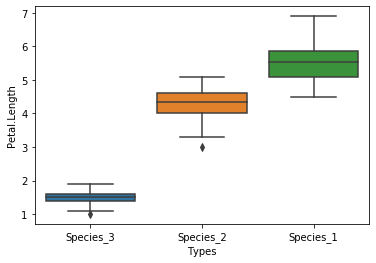

In [83]:
## box plots for the variable Petal.Length for different levels of Type
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(y='Petal.Length',x='Types',data=data)



In [ ]:
# Creating a linear model to estimate Petal.Length using all other four covariates.
model= lm(Petal.Length~Sepal.Length+Sepal.Width+Petal.Width+Type, data = iris)

In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [75]:
X=data[["Sepal.Length","Sepal.Width","Petal.Width","Types"]]
y=data["Petal.Length"]

In [76]:
X = pandas.get_dummies(data=X, drop_first=True)
X.head()

,Sepal.Length,Sepal.Width,Petal.Width,Types_Species_2,Types_Species_1
0,4.9,3.0,0.2,0,0
1,4.7,3.2,0.2,0,0
2,4.6,3.1,0.2,0,0
3,5.0,3.6,0.2,0,0
4,5.4,3.9,0.4,0,0


In [77]:
model = LinearRegression().fit(X,y)

In [80]:
# Reporting coefficients
model.intercept_

-1.0980993020711645

In [81]:
coeff = pandas.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff

,Coefficient
Sepal.Length,0.610238
Sepal.Width,-0.186641
Petal.Width,0.601686
Types_Species_2,1.454888
Types_Species_1,1.965907
